<div style="background: linear-gradient(to right,rgb(225, 231, 134),rgb(176, 238, 148),rgb(150, 232, 238)); padding: 20px; border-radius: 10px; text-align: center; box-shadow: 0 10px 20px rgba(0,0,0,0.19), 0 6px 6px rgba(0,0,0,0.23);">
    <span style="font-family: 'Montserrat', sans-serif; font-weight: 800; font-size: 2.5em; color: white; text-shadow: 2px 2px 4px #000;">✨ 2 CLASS CLASSIFICATION MANUAL AND CLASS WEIGHTS STRATEGY✨</span>
</div>

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GroupKFold
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import precision_score, recall_score, f1_score, balanced_accuracy_score
import pickle
from collections import defaultdict
from sklearn.utils import shuffle
import os
import cv2
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
import pandas as pd

from torchinfo import summary
from sklearn.metrics import confusion_matrix
import seaborn as sns



<div style="background: linear-gradient(to right,rgb(225, 231, 134),rgb(176, 238, 148),rgb(150, 232, 238)); padding: 20px; border-radius: 10px; text-align: center; box-shadow: 0 10px 20px rgba(0,0,0,0.19), 0 6px 6px rgba(0,0,0,0.23);">
    <span style="font-family: 'Montserrat', sans-serif; font-weight: 800; font-size: 2.5em; color: white; text-shadow: 2px 2px 4px #000;">✨ LOADING THE SPLIT DATA ARRAYS ✨</span>
</div>

<div style="background: linear-gradient(to right,rgb(225, 231, 134),rgb(176, 238, 148),rgb(150, 232, 238)); padding: 15px; border-radius: 8px; text-align: center; box-shadow: 0 8px 16px rgba(0,0,0,0.19), 0 4px 4px rgba(0,0,0,0.23);">
    <span style="font-family: 'Montserrat', sans-serif; font-weight: 700; font-size: 1.2em; color: white; text-shadow: 1px 1px 3px #000;">📁 reminder to change the folder path to your numpy array folder 📁</span>
</div>

In [2]:
import numpy as np
import os

# Define the folder path
folder_path = r"D:\PYTHONIG\newwindow\NOTEBOOKS_2025\aprilmay2025\data\numpy\cwtnormalized\concatenatedspectrograms"

# Load the numpy files into the respective arrays with the correct capitalized naming
eeg_fold_1 = np.load(os.path.join(folder_path, 'CWT_DATA_FOLD_fold_1.npy'))
labels_fold_1 = np.load(os.path.join(folder_path, 'CWT_LABELS_FOLD_fold_1.npy'))
patients_fold_1 = np.load(os.path.join(folder_path, 'CWT_PATIENTS_FOLD_fold_1.npy'))

eeg_fold_2 = np.load(os.path.join(folder_path, 'CWT_DATA_FOLD_fold_2.npy'))
labels_fold_2 = np.load(os.path.join(folder_path, 'CWT_LABELS_FOLD_fold_2.npy'))
patients_fold_2 = np.load(os.path.join(folder_path, 'CWT_PATIENTS_FOLD_fold_2.npy'))

eeg_fold_3 = np.load(os.path.join(folder_path, 'CWT_DATA_FOLD_fold_3.npy'))
labels_fold_3 = np.load(os.path.join(folder_path, 'CWT_LABELS_FOLD_fold_3.npy'))
patients_fold_3 = np.load(os.path.join(folder_path, 'CWT_PATIENTS_FOLD_fold_3.npy'))

eeg_fold_4 = np.load(os.path.join(folder_path, 'CWT_DATA_FOLD_fold_4.npy'))
labels_fold_4 = np.load(os.path.join(folder_path, 'CWT_LABELS_FOLD_fold_4.npy'))
patients_fold_4 = np.load(os.path.join(folder_path, 'CWT_PATIENTS_FOLD_fold_4.npy'))

eeg_fold_5 = np.load(os.path.join(folder_path, 'CWT_DATA_FOLD_fold_5.npy'))
labels_fold_5 = np.load(os.path.join(folder_path, 'CWT_LABELS_FOLD_fold_5.npy'))
patients_fold_5 = np.load(os.path.join(folder_path, 'CWT_PATIENTS_FOLD_fold_5.npy'))

eeg_folds = [eeg_fold_1, eeg_fold_2, eeg_fold_3, eeg_fold_4, eeg_fold_5]
labels_folds = [labels_fold_1, labels_fold_2, labels_fold_3, labels_fold_4, labels_fold_5]
patients_folds = [patients_fold_1, patients_fold_2, patients_fold_3, patients_fold_4, patients_fold_5]

for i in range(len(eeg_folds)):
    eeg_folds[i] = eeg_folds[i].astype(np.float16)

<div style="background: linear-gradient(to right,rgb(225, 231, 134),rgb(176, 238, 148),rgb(150, 232, 238)); padding: 15px; border-radius: 8px; text-align: center; box-shadow: 0 8px 16px rgba(0,0,0,0.19), 0 4px 4px rgba(0,0,0,0.23);">
    <span style="font-family: 'Montserrat', sans-serif; font-weight: 700; font-size: 1.2em; color: white; text-shadow: 1px 1px 3px #000;">converting to 2 class</span>
</div>

In [3]:
for i in range (len(labels_fold_1)):
    if (labels_fold_1[i] == 2):
        labels_fold_1[i] = 1

for i in range (len(labels_fold_2)):
    if (labels_fold_2[i] == 2):
        labels_fold_2[i] = 1

for i in range (len(labels_fold_3)):
    if (labels_fold_3[i] == 2):
        labels_fold_3[i] = 1

for i in range (len(labels_fold_4)):
    if (labels_fold_4[i] == 2):
        labels_fold_4[i] = 1

for i in range (len(labels_fold_5)):
    if (labels_fold_5[i] == 2):
        labels_fold_5[i] = 1

<div style="background: linear-gradient(to right,rgb(225, 231, 134),rgb(176, 238, 148),rgb(150, 232, 238)); padding: 15px; border-radius: 8px; text-align: center; box-shadow: 0 8px 16px rgba(0,0,0,0.19), 0 4px 4px rgba(0,0,0,0.23);">
    <span style="font-family: 'Montserrat', sans-serif; font-weight: 700; font-size: 1.2em; color: white; text-shadow: 1px 1px 3px #000;">data balancer & early stopping</span>
</div>

In [4]:
def data_balancer(data, labels, factor):
    # Count the number of samples in each class
    num_class_0 = np.sum(labels == 0)
    num_class_1 = np.sum(labels == 1)


    # Find the minimum number of samples across all classes
    min_samples = min(num_class_0, num_class_1)

    # Calculate the number of samples to take from each class
    samples_per_class = min_samples // factor

    # Randomly sample 'samples_per_class' from each class
    class_0_indices = np.random.choice(np.where(labels == 0)[0], samples_per_class, replace=False)
    class_1_indices = np.random.choice(np.where(labels == 1)[0], samples_per_class, replace=False)


    # Combine balanced indices
    balanced_indices = np.concatenate((class_0_indices, class_1_indices))

    # Shuffle the balanced indices
    np.random.shuffle(balanced_indices)

    # Create balanced training data and labels
    balanced_data = data[balanced_indices]
    balanced_labels = labels[balanced_indices]

    return balanced_data, balanced_labels

In [5]:
class EarlyStopping:
    def __init__(self, patience=5):
        """
        Initializes the early stopping mechanism based on divergence detection.

        Args:
            patience (int): Number of consecutive epochs with increasing validation loss
                            before stopping.
        """
        self.patience = patience
        self.best_loss = None
        self.counter = 0
        self.early_stop = False
        self.best_model_state = None

    def __call__(self, val_loss, model):
        """
        Checks if the validation loss is diverging and updates the state accordingly.

        Args:
            val_loss (float): Current epoch's validation loss.
            model (torch.nn.Module): The model being trained.
        """
        if self.best_loss is None or val_loss < self.best_loss:
            # Improvement detected
            self.best_loss = val_loss
            self.best_model_state = model.state_dict()
            self.counter = 0
        else:
            # Validation loss increased
            self.counter += 1
            if self.counter >= self.patience:
                print(f"Divergence detected. Stopping training after {self.counter} epochs.")
                self.early_stop = True

    def load_best_model(self, model):
        """
        Restores the model to the state with the lowest validation loss.

        Args:
            model (torch.nn.Module): The model to restore.
        """
        model.load_state_dict(self.best_model_state)




<div style="background: linear-gradient(to right,rgb(225, 231, 134),rgb(176, 238, 148),rgb(150, 232, 238)); padding: 15px; border-radius: 8px; text-align: center; box-shadow: 0 8px 16px rgba(0,0,0,0.19), 0 4px 4px rgba(0,0,0,0.23);">
    <span style="font-family: 'Montserrat', sans-serif; font-weight: 700; font-size: 1.2em; color: white; text-shadow: 1px 1px 3px #000;">Result plotting</span>
</div>

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    confusion_matrix,
    precision_recall_curve,
    roc_curve,
    auc,
    f1_score,
    balanced_accuracy_score,
    classification_report,
)
from sklearn.preprocessing import label_binarize

def plot_metrics(labels, predictions, n_classes=2):
    """
    Computes and visualizes classification metrics.

    Args:
        labels (array-like): True class labels.
        predictions (array-like): Probabilities or class predictions.
        n_classes (int): Number of classes (default: 2 for binary classification).
    """
    
    # Convert probability predictions to class labels if needed
    if predictions.ndim > 1:
        predicted_classes = np.argmax(predictions, axis=1)
    else:
        predicted_classes = predictions

    # Compute Confusion Matrix
    cm = confusion_matrix(labels, predicted_classes)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

    # Class-wise Accuracy
    print("\nClass-wise Accuracy:")
    class_accuracies = []
    for d in range(n_classes):
        correct_preds = cm[d][d]
        total_true_samples = sum(cm[d])
        accuracy = correct_preds / total_true_samples if total_true_samples > 0 else 0
        class_accuracies.append(accuracy)
        print(f'Class {d}: {correct_preds}/{total_true_samples} ({accuracy:.2%})')

    # Precision-Recall Curve & AUPRC
    print("\nPrecision-Recall Curve:")
    plt.figure()
    
    if n_classes == 2:
        # Binary classification
        precision, recall, _ = precision_recall_curve(labels, predictions[:, 1])
        auprc = auc(recall, precision)
        plt.plot(recall, precision, label=f'AUPRC = {auprc:.2f}')
        avg_auprc = auprc
    else:
        # Multi-class case
        labels_binarized = label_binarize(labels, classes=np.arange(n_classes))
        auprcs = []
        for class_idx in range(n_classes):
            precision, recall, _ = precision_recall_curve(labels_binarized[:, class_idx], predictions[:, class_idx])
            auprc = auc(recall, precision)
            auprcs.append(auprc)
            plt.plot(recall, precision, label=f'Class {class_idx} (AUPRC = {auprc:.2f})')
        avg_auprc = np.mean(auprcs)

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend()
    plt.grid(True)
    plt.show()

    # ROC Curve & AUC
    print("\nROC Curve:")
    plt.figure()
    
    if n_classes == 2:
        # Binary classification
        fpr, tpr, _ = roc_curve(labels, predictions[:, 1])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
    else:
        # Multi-class case
        for class_idx in range(n_classes):
            fpr, tpr, _ = roc_curve(labels_binarized[:, class_idx], predictions[:, class_idx])
            roc_auc = auc(fpr, tpr)
            plt.plot(fpr, tpr, label=f'Class {class_idx} (AUC = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Compute Metrics
    f1 = f1_score(labels, predicted_classes, average='macro')
    balanced_acc = balanced_accuracy_score(labels, predicted_classes)

    print(f"\nMean F1 Score: {f1:.4f}")
    print(f"Balanced Accuracy: {balanced_acc:.4f}")
    print(f"Average AUPRC: {avg_auprc:.4f}")

    print("\nClassification Report:")
    print(classification_report(labels, predicted_classes))

    return {
        "confusion_matrix": cm,
        "class_wise_accuracy": class_accuracies,
        "mean_f1_score": f1,
        "balanced_accuracy": balanced_acc,
    }


<div style="background: linear-gradient(to right,rgb(225, 231, 134),rgb(238, 206, 148),rgb(238, 150, 150)); padding: 15px; border-radius: 8px; text-align: center; box-shadow: 0 8px 16px rgba(0,0,0,0.19), 0 4px 4px rgba(0,0,0,0.23);">
    <span style="font-family: 'Montserrat', sans-serif; font-weight: 700; font-size: 1.2em; color: white; text-shadow: 1px 1px 3px #000;">MODEL GOES HERE</span>
</div>

In [7]:
import torch
import torch.nn as nn

debug_mode_flag = False
# Set the device to GPU if available, otherwise use CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

#set random seed for reproducibility
torch.manual_seed(42)
debug_mode_flag = False


def patchify(data, n_patches):
    n, c, h, w = data.shape
    # Create tensor on the same device as input data
    patches = torch.zeros(n, n_patches**2, (c*h*w) // (n_patches**2), device=data.device)
    patch_size = h // n_patches
    for idx, d in enumerate(data):
        for i in range(n_patches):
            for j in range(n_patches):
                patch = d[:, i*patch_size: (i+1)*patch_size, j*patch_size: (j+1) * patch_size]
                patches[idx, i*n_patches + j] = patch.flatten()
    return patches

def get_positional_embeddings(sequence_length, d, device='cpu'):
    result = torch.ones(sequence_length, d, device=device)
    for i in range(sequence_length):
        for j in range(d):
            result[i][j] = np.sin(i / (10000 ** (j / d))) if j % 2 == 0 else np.cos(i / (10000 ** ((j - 1) / d)))
    return result

class vit(nn.Module):
    def __init__(self, input_size, n_patches, hidden_size, num_classes,num_transformer_blocks=2,num_heads=4):
        
        super().__init__()
        self.chw = input_size
        self.n_patches = n_patches
        self.patch_size = ((self.chw[1] // n_patches) ** 2) * self.chw[0]
        self.linear_mapper = nn.Linear(self.patch_size, hidden_size)
        self.class_token = nn.Parameter(torch.rand(1, hidden_size))
        self.pos_embed = nn.Parameter(torch.tensor(
                                            get_positional_embeddings(self.n_patches ** 2 + 1, hidden_size), 
                                            device=self.class_token.device
                                        ))
        self.pos_embed.requires_grad = True
        self.layer_norm = nn.LayerNorm(hidden_size)

        # Transformer encoder layers
        self.encoder_layers = nn.ModuleList([
            nn.TransformerEncoderLayer(d_model=hidden_size, nhead=num_heads, batch_first=True)
            for _ in range(num_transformer_blocks)
        ])
        self.classifier = nn.Sequential(nn.Linear(hidden_size, num_classes))

        # For saliency maps
        self.gradients = None
        self.activations = None
        self._register_hook = False

    def save_gradient(self, grad):
        self.gradients = grad

    def forward(self, x):
        patches = patchify(x, self.n_patches)
        
        x = self.linear_mapper(patches)
        x = torch.stack([torch.vstack((self.class_token, x[i])) for i in range(len(x))])
        pos_embed = self.pos_embed.repeat(len(x), 1, 1)
        x = x + pos_embed
        x = self.layer_norm(x)

        # Pass through transformer encoder layers
        for idx, layer in enumerate(self.encoder_layers):
            x = layer(x)
            if idx == len(self.encoder_layers) - 1 and not self._register_hook:
                x.register_hook(self.save_gradient)  # Register hook only once
                self._register_hook = True
            self.activations = x  # Save the latest activations

        x = x[:, 0]  # Select CLS token for classification
        x = self.classifier(x)
        return x

    def get_activations_gradient(self):
        return self.gradients

    def get_activations(self):
        return self.activations

    def set_hook(self, hook_status):
        self._register_hook = hook_status

<div style="background: linear-gradient(to right,rgb(225, 231, 134),rgb(238, 206, 148),rgb(238, 150, 150)); padding: 15px; border-radius: 8px; text-align: center; box-shadow: 0 8px 16px rgba(0,0,0,0.19), 0 4px 4px rgba(0,0,0,0.23);">
    <span style="font-family: 'Montserrat', sans-serif; font-weight: 700; font-size: 1.2em; color: white; text-shadow: 1px 1px 3px #000;">Test with demo data & model Summary</span>
</div>

In [8]:

randomdata = torch.randn((1, 3, 224, 224))  # Adjusted to match the input shape (batch_size, channels, height, width)

# Modify the vit parameters to accommodate the shape mismatch
model = vit(input_size=(3, 224, 224), n_patches=14, hidden_size=256, num_classes=2)  # Adjusted n_patches and hidden_size
output = model(randomdata)
output.shape

C:\Users\Gabriel\AppData\Local\Temp\ipykernel_21152\1314118163.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.pos_embed = nn.Parameter(torch.tensor(


torch.Size([1, 2])

In [9]:
from torchinfo import summary

summary(model)

Layer (type:depth-idx)                                       Param #
vit                                                          50,688
├─Linear: 1-1                                                196,864
├─LayerNorm: 1-2                                             512
├─ModuleList: 1-3                                            --
│    └─TransformerEncoderLayer: 2-1                          --
│    │    └─MultiheadAttention: 3-1                          263,168
│    │    └─Linear: 3-2                                      526,336
│    │    └─Dropout: 3-3                                     --
│    │    └─Linear: 3-4                                      524,544
│    │    └─LayerNorm: 3-5                                   512
│    │    └─LayerNorm: 3-6                                   512
│    │    └─Dropout: 3-7                                     --
│    │    └─Dropout: 3-8                                     --
│    └─TransformerEncoderLayer: 2-2                          --
│    │  

<div style="background: linear-gradient(to right,rgb(225, 231, 134),rgb(238, 206, 148),rgb(238, 150, 150)); padding: 15px; border-radius: 8px; text-align: center; box-shadow: 0 8px 16px rgba(0,0,0,0.19), 0 4px 4px rgba(0,0,0,0.23);">
    <span style="font-family: 'Montserrat', sans-serif; font-weight: 700; font-size: 1.2em; color: white; text-shadow: 1px 1px 3px #000;">Training Code</span>
</div>


HYPERPARAMETER SET 1
Parameters: {'n_patches': 28, 'embed_dim': 128, 'learning_rate': 3.6467910524712975e-05, 'weight_decay': 1.1407515349694686e-05, 'batch_size': 32, 'num_transformer_blocks': 6, 'num_heads': 8, 'accuracy': 0.4555}

Fold No: 1


C:\Users\Gabriel\AppData\Local\Temp\ipykernel_21152\1314118163.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.pos_embed = nn.Parameter(torch.tensor(


Epoch [1/100], Loss: 0.7056, Accuracy: 0.5239
Validation Loss: 0.7057, Validation Accuracy: 0.5346
Epoch [2/100], Loss: 0.6953, Accuracy: 0.5318
Validation Loss: 0.6845, Validation Accuracy: 0.5694
Epoch [3/100], Loss: 0.6931, Accuracy: 0.5408
Validation Loss: 0.6828, Validation Accuracy: 0.5697
Epoch [4/100], Loss: 0.6929, Accuracy: 0.5278
Validation Loss: 0.7185, Validation Accuracy: 0.5197
Epoch [5/100], Loss: 0.6908, Accuracy: 0.5338
Validation Loss: 0.7155, Validation Accuracy: 0.5222
Epoch [6/100], Loss: 0.6875, Accuracy: 0.5691
Validation Loss: 0.6764, Validation Accuracy: 0.5538
Epoch [7/100], Loss: 0.6862, Accuracy: 0.5572
Validation Loss: 0.6917, Validation Accuracy: 0.5584
Epoch [8/100], Loss: 0.6919, Accuracy: 0.5368
Validation Loss: 0.7181, Validation Accuracy: 0.5395
Epoch [9/100], Loss: 0.6831, Accuracy: 0.5895
Validation Loss: 0.6991, Validation Accuracy: 0.5560
Epoch [10/100], Loss: 0.6824, Accuracy: 0.5666
Validation Loss: 0.6989, Validation Accuracy: 0.5510
Epoch [11

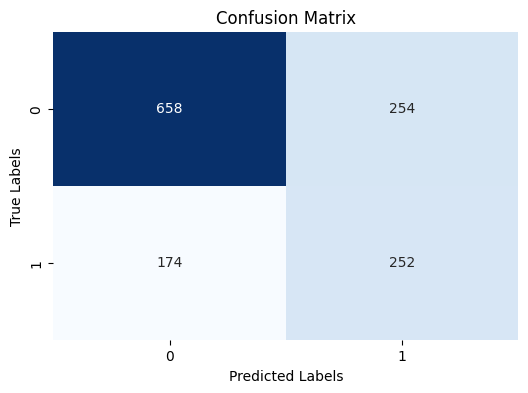


Class-wise Accuracy:
Class 0: 658/912 (72.15%)
Class 1: 252/426 (59.15%)

Precision-Recall Curve:


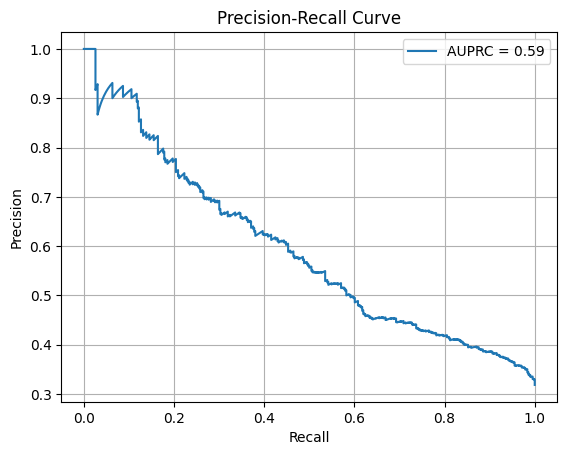


ROC Curve:


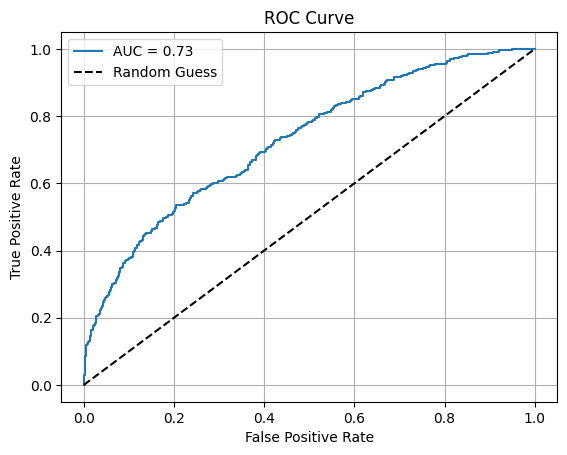


Mean F1 Score: 0.6477
Balanced Accuracy: 0.6565
Average AUPRC: 0.5912

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.72      0.75       912
           1       0.50      0.59      0.54       426

    accuracy                           0.68      1338
   macro avg       0.64      0.66      0.65      1338
weighted avg       0.70      0.68      0.69      1338


Fold No: 2


C:\Users\Gabriel\AppData\Local\Temp\ipykernel_21152\1314118163.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.pos_embed = nn.Parameter(torch.tensor(


Epoch [1/100], Loss: 0.7055, Accuracy: 0.5263
Validation Loss: 0.6851, Validation Accuracy: 0.5588
Epoch [2/100], Loss: 0.6878, Accuracy: 0.5622
Validation Loss: 0.7072, Validation Accuracy: 0.5678
Epoch [3/100], Loss: 0.6898, Accuracy: 0.5468
Validation Loss: 0.6775, Validation Accuracy: 0.5398
Epoch [4/100], Loss: 0.6871, Accuracy: 0.5622
Validation Loss: 0.6886, Validation Accuracy: 0.5792
Epoch [5/100], Loss: 0.6883, Accuracy: 0.5560
Validation Loss: 0.7067, Validation Accuracy: 0.5541
Epoch [6/100], Loss: 0.6829, Accuracy: 0.5933
Validation Loss: 0.6588, Validation Accuracy: 0.4905
Epoch [7/100], Loss: 0.6874, Accuracy: 0.5657
Validation Loss: 0.6811, Validation Accuracy: 0.5885
Epoch [8/100], Loss: 0.6855, Accuracy: 0.5635
Validation Loss: 0.7078, Validation Accuracy: 0.5598
Epoch [9/100], Loss: 0.6833, Accuracy: 0.5792
Validation Loss: 0.7345, Validation Accuracy: 0.5400
Epoch [10/100], Loss: 0.6899, Accuracy: 0.5377
Validation Loss: 0.6836, Validation Accuracy: 0.5948
Epoch [11

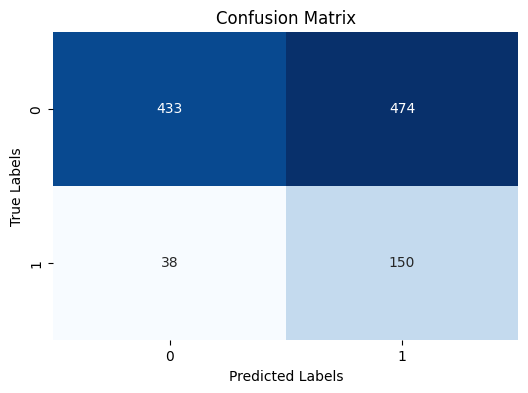


Class-wise Accuracy:
Class 0: 433/907 (47.74%)
Class 1: 150/188 (79.79%)

Precision-Recall Curve:


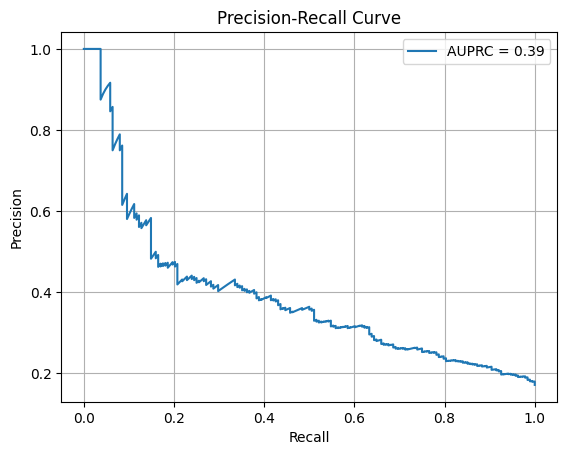


ROC Curve:


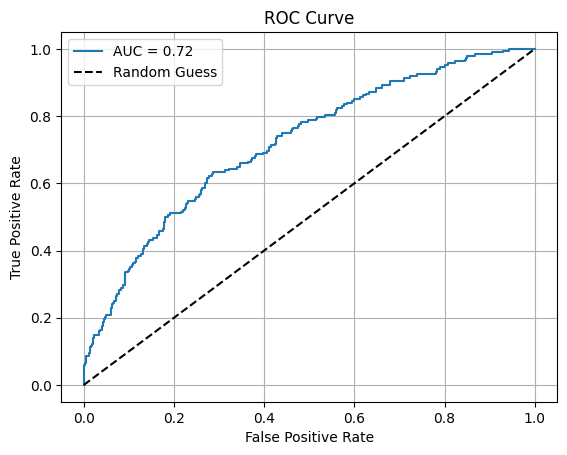


Mean F1 Score: 0.4990
Balanced Accuracy: 0.6376
Average AUPRC: 0.3885

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.48      0.63       907
           1       0.24      0.80      0.37       188

    accuracy                           0.53      1095
   macro avg       0.58      0.64      0.50      1095
weighted avg       0.80      0.53      0.58      1095


Fold No: 3


C:\Users\Gabriel\AppData\Local\Temp\ipykernel_21152\1314118163.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.pos_embed = nn.Parameter(torch.tensor(


Epoch [1/100], Loss: 0.6987, Accuracy: 0.5318
Validation Loss: 0.6728, Validation Accuracy: 0.4531
Epoch [2/100], Loss: 0.7001, Accuracy: 0.5205
Validation Loss: 0.7354, Validation Accuracy: 0.5111
Epoch [3/100], Loss: 0.6918, Accuracy: 0.5318
Validation Loss: 0.7081, Validation Accuracy: 0.4673
Epoch [4/100], Loss: 0.6913, Accuracy: 0.5375
Validation Loss: 0.7498, Validation Accuracy: 0.5151
Epoch [5/100], Loss: 0.6893, Accuracy: 0.5399
Validation Loss: 0.6910, Validation Accuracy: 0.4615
Epoch [6/100], Loss: 0.6873, Accuracy: 0.5596
Validation Loss: 0.6828, Validation Accuracy: 0.4698
Epoch [7/100], Loss: 0.6877, Accuracy: 0.5500
Validation Loss: 0.6924, Validation Accuracy: 0.5539
Epoch [8/100], Loss: 0.6898, Accuracy: 0.5375
Validation Loss: 0.6927, Validation Accuracy: 0.4978
Epoch [9/100], Loss: 0.6857, Accuracy: 0.5564
Validation Loss: 0.7084, Validation Accuracy: 0.4972
Epoch [10/100], Loss: 0.6836, Accuracy: 0.5810
Validation Loss: 0.7124, Validation Accuracy: 0.5349
Epoch [11

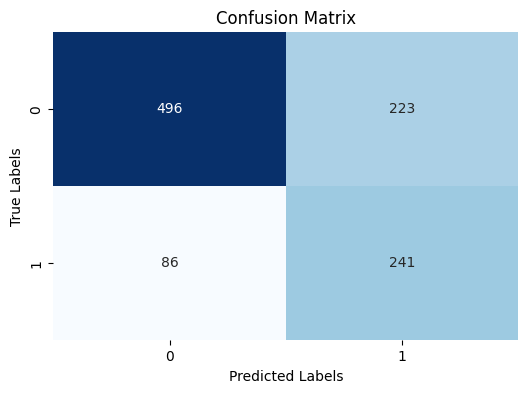


Class-wise Accuracy:
Class 0: 496/719 (68.98%)
Class 1: 241/327 (73.70%)

Precision-Recall Curve:


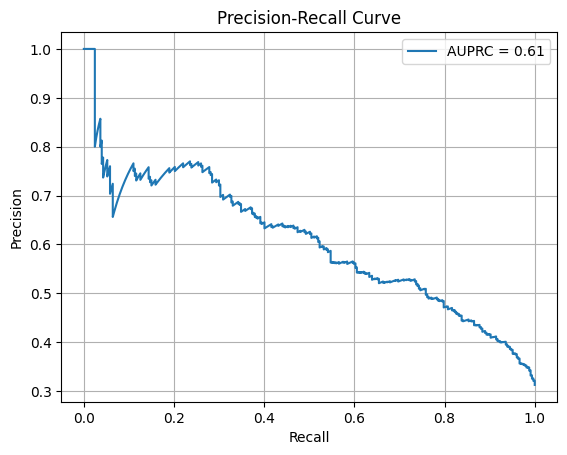


ROC Curve:


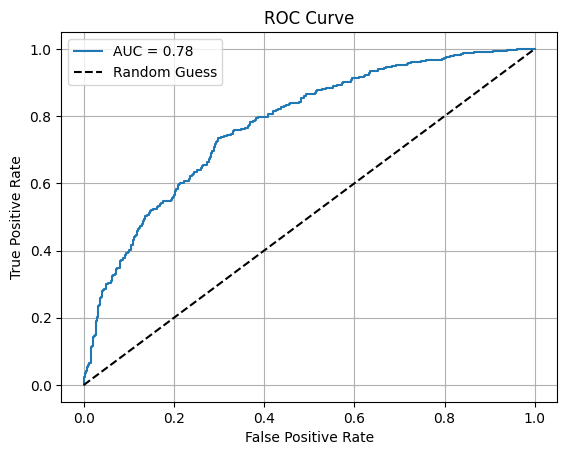


Mean F1 Score: 0.6859
Balanced Accuracy: 0.7134
Average AUPRC: 0.6059

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.69      0.76       719
           1       0.52      0.74      0.61       327

    accuracy                           0.70      1046
   macro avg       0.69      0.71      0.69      1046
weighted avg       0.75      0.70      0.71      1046


Fold No: 4


C:\Users\Gabriel\AppData\Local\Temp\ipykernel_21152\1314118163.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.pos_embed = nn.Parameter(torch.tensor(


Epoch [1/100], Loss: 0.7225, Accuracy: 0.5000
Validation Loss: 0.7412, Validation Accuracy: 0.5000
Epoch [2/100], Loss: 0.6950, Accuracy: 0.5165
Validation Loss: 0.6963, Validation Accuracy: 0.5883
Epoch [3/100], Loss: 0.6955, Accuracy: 0.5229
Validation Loss: 0.6682, Validation Accuracy: 0.5306
Epoch [4/100], Loss: 0.6962, Accuracy: 0.5133
Validation Loss: 0.6723, Validation Accuracy: 0.5092
Epoch [5/100], Loss: 0.6939, Accuracy: 0.5165
Validation Loss: 0.6882, Validation Accuracy: 0.6287
Epoch [6/100], Loss: 0.6919, Accuracy: 0.5421
Validation Loss: 0.6590, Validation Accuracy: 0.5000
Epoch [7/100], Loss: 0.6927, Accuracy: 0.5330
Validation Loss: 0.7032, Validation Accuracy: 0.5583
Epoch [8/100], Loss: 0.6933, Accuracy: 0.5352
Validation Loss: 0.6755, Validation Accuracy: 0.6727
Epoch [9/100], Loss: 0.6890, Accuracy: 0.5378
Validation Loss: 0.6725, Validation Accuracy: 0.6772
Epoch [10/100], Loss: 0.6800, Accuracy: 0.5970
Validation Loss: 0.7084, Validation Accuracy: 0.5985
Epoch [11

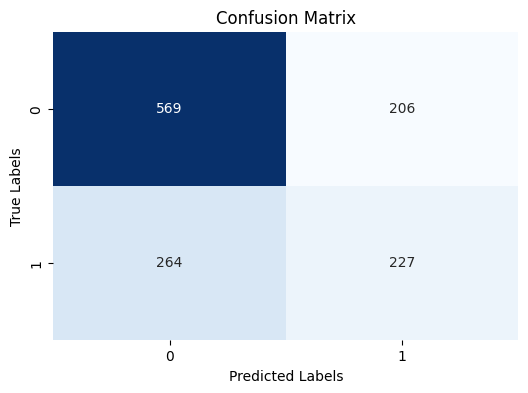


Class-wise Accuracy:
Class 0: 569/775 (73.42%)
Class 1: 227/491 (46.23%)

Precision-Recall Curve:


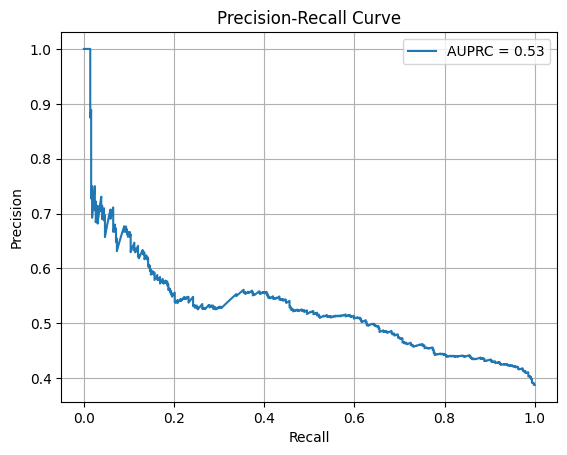


ROC Curve:


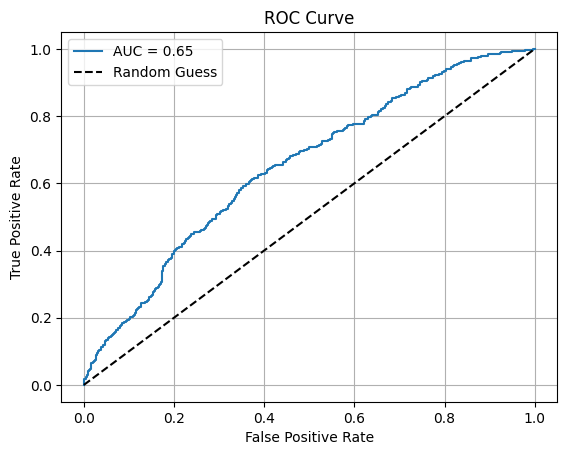


Mean F1 Score: 0.5995
Balanced Accuracy: 0.5983
Average AUPRC: 0.5277

Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.73      0.71       775
           1       0.52      0.46      0.49       491

    accuracy                           0.63      1266
   macro avg       0.60      0.60      0.60      1266
weighted avg       0.62      0.63      0.62      1266


Fold No: 5


C:\Users\Gabriel\AppData\Local\Temp\ipykernel_21152\1314118163.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.pos_embed = nn.Parameter(torch.tensor(


Epoch [1/100], Loss: 0.7031, Accuracy: 0.5000
Validation Loss: 0.6765, Validation Accuracy: 0.5000
Epoch [2/100], Loss: 0.6983, Accuracy: 0.5149
Validation Loss: 0.6753, Validation Accuracy: 0.5000
Epoch [3/100], Loss: 0.6919, Accuracy: 0.5457
Validation Loss: 0.7094, Validation Accuracy: 0.5538
Epoch [4/100], Loss: 0.6913, Accuracy: 0.5478
Validation Loss: 0.6867, Validation Accuracy: 0.5635
Epoch [5/100], Loss: 0.6873, Accuracy: 0.5595
Validation Loss: 0.6818, Validation Accuracy: 0.5515
Epoch [6/100], Loss: 0.6841, Accuracy: 0.5744
Validation Loss: 0.6835, Validation Accuracy: 0.5469
Epoch [7/100], Loss: 0.6835, Accuracy: 0.5840
Validation Loss: 0.6913, Validation Accuracy: 0.5655
Epoch [8/100], Loss: 0.6807, Accuracy: 0.5765
Validation Loss: 0.6778, Validation Accuracy: 0.5302
Epoch [9/100], Loss: 0.6825, Accuracy: 0.5834
Validation Loss: 0.6775, Validation Accuracy: 0.5430
Epoch [10/100], Loss: 0.6780, Accuracy: 0.5972
Validation Loss: 0.6821, Validation Accuracy: 0.5166
Epoch [11

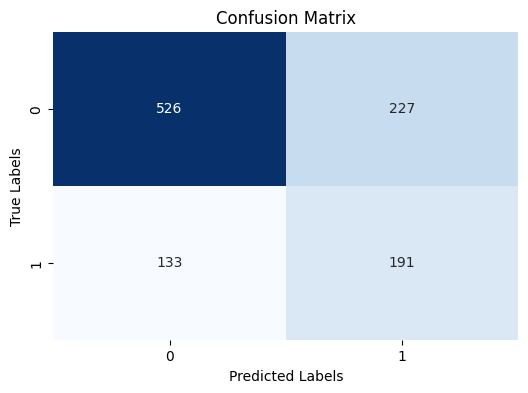


Class-wise Accuracy:
Class 0: 526/753 (69.85%)
Class 1: 191/324 (58.95%)

Precision-Recall Curve:


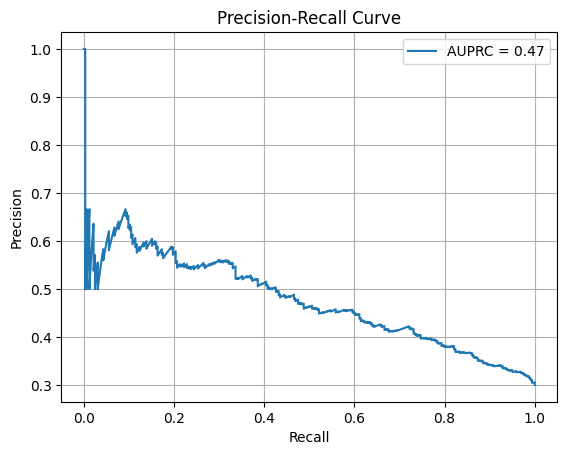


ROC Curve:


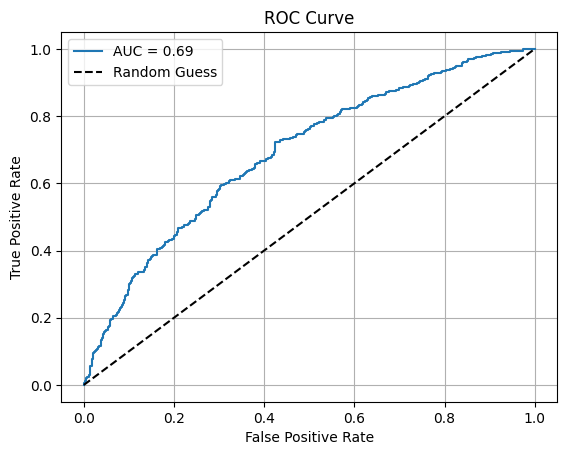


Mean F1 Score: 0.6299
Balanced Accuracy: 0.6440
Average AUPRC: 0.4745

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.70      0.75       753
           1       0.46      0.59      0.51       324

    accuracy                           0.67      1077
   macro avg       0.63      0.64      0.63      1077
weighted avg       0.70      0.67      0.68      1077


------------------------------------------------------------
RESULTS FOR HYPERPARAMETER SET 1:
------------------------------------------------------------
Balanced Accuracy for each fold: ['0.6565', '0.6376', '0.7134', '0.5983', '0.6440']
Average Balanced Accuracy across all folds: 0.6500
AUPRC for each fold: ['0.5912', '0.3885', '0.6059', '0.5277', '0.4745']
Average AUPRC across all folds: 0.5176
Best fold (Fold 3) class-wise accuracy:
  Class 0: Precision=0.8522, Recall=0.6898, F1=0.7625
  Class 1: Precision=0.5194, Recall=0.7370, F1=0.6094
  Macro Avg: Precision=0.68

C:\Users\Gabriel\AppData\Local\Temp\ipykernel_21152\1314118163.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.pos_embed = nn.Parameter(torch.tensor(


Epoch [1/100], Loss: 0.7001, Accuracy: 0.5169
Validation Loss: 0.6602, Validation Accuracy: 0.4956
Epoch [2/100], Loss: 0.6943, Accuracy: 0.5214
Validation Loss: 0.6730, Validation Accuracy: 0.5473
Epoch [3/100], Loss: 0.6927, Accuracy: 0.5298
Validation Loss: 0.6527, Validation Accuracy: 0.4993
Epoch [4/100], Loss: 0.6878, Accuracy: 0.5567
Validation Loss: 0.6766, Validation Accuracy: 0.5672
Epoch [5/100], Loss: 0.6937, Accuracy: 0.5065
Validation Loss: 0.7066, Validation Accuracy: 0.5191
Epoch [6/100], Loss: 0.6886, Accuracy: 0.5507
Validation Loss: 0.6615, Validation Accuracy: 0.5397
Epoch [7/100], Loss: 0.6921, Accuracy: 0.5363
Validation Loss: 0.6849, Validation Accuracy: 0.5671
Epoch [8/100], Loss: 0.6833, Accuracy: 0.5636
Validation Loss: 0.6856, Validation Accuracy: 0.5773
Epoch [9/100], Loss: 0.6835, Accuracy: 0.5621
Validation Loss: 0.6801, Validation Accuracy: 0.5647
Epoch [10/100], Loss: 0.6821, Accuracy: 0.5731
Validation Loss: 0.6925, Validation Accuracy: 0.5693
Epoch [11

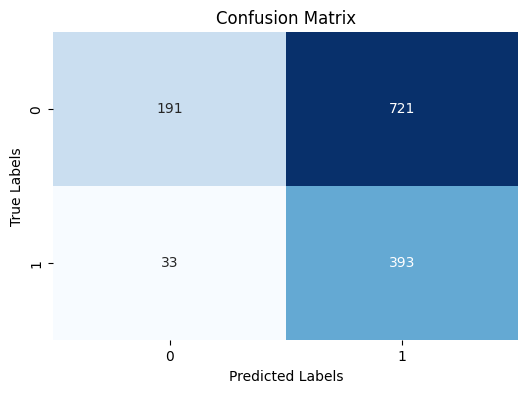


Class-wise Accuracy:
Class 0: 191/912 (20.94%)
Class 1: 393/426 (92.25%)

Precision-Recall Curve:


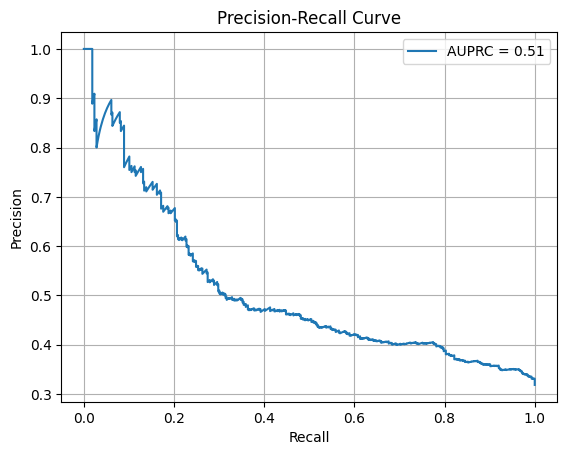


ROC Curve:


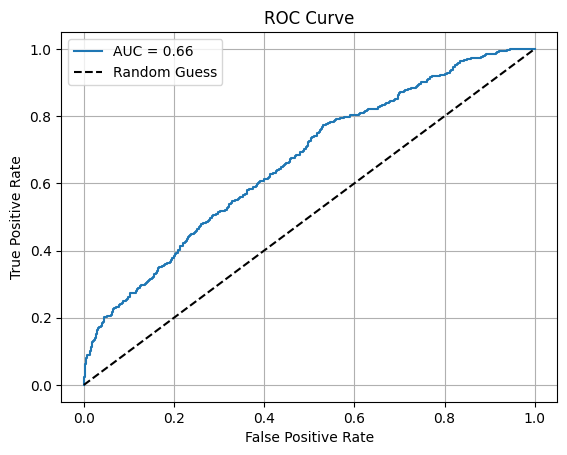


Mean F1 Score: 0.4233
Balanced Accuracy: 0.5660
Average AUPRC: 0.5071

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.21      0.34       912
           1       0.35      0.92      0.51       426

    accuracy                           0.44      1338
   macro avg       0.60      0.57      0.42      1338
weighted avg       0.69      0.44      0.39      1338


Fold No: 2


C:\Users\Gabriel\AppData\Local\Temp\ipykernel_21152\1314118163.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.pos_embed = nn.Parameter(torch.tensor(


Epoch [1/100], Loss: 0.6996, Accuracy: 0.5320
Validation Loss: 0.6906, Validation Accuracy: 0.5741
Epoch [2/100], Loss: 0.6905, Accuracy: 0.5486
Validation Loss: 0.7034, Validation Accuracy: 0.5706
Epoch [3/100], Loss: 0.6890, Accuracy: 0.5512


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import balanced_accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import label_binarize
from sklearn.metrics import precision_recall_curve, auc
import pandas as pd
import os
import datetime

# Define hyperparameter sets
hyperparameter_sets = [
    {'n_patches': 28, 'embed_dim': 128, 'learning_rate': 3.6467910524712975e-05, 'weight_decay': 1.1407515349694686e-05, 'batch_size': 32, 'num_transformer_blocks': 6, 'num_heads': 8, 'accuracy': 0.4555},
    {'n_patches': 14, 'embed_dim': 64, 'learning_rate': 2.9195609817654728e-05, 'weight_decay': 6.40075182717267e-05, 'batch_size': 16, 'num_transformer_blocks': 4, 'num_heads': 4, 'accuracy': 0.4549},
    {'n_patches': 14, 'embed_dim': 256, 'learning_rate': 4.658629178609918e-05, 'weight_decay': 2.145402908576287e-05, 'batch_size': 16, 'num_transformer_blocks': 4, 'num_heads': 4, 'accuracy': 0.4516},
    {'n_patches': 14, 'embed_dim': 256, 'learning_rate': 2.5893793649076787e-05, 'weight_decay': 3.284975130996957e-05, 'batch_size': 32, 'num_transformer_blocks': 4, 'num_heads': 4, 'accuracy': 0.4498},
    {'n_patches': 14, 'embed_dim': 64, 'learning_rate': 1.303548468658277e-05, 'weight_decay': 2.2203605523088946e-05, 'batch_size': 32, 'num_transformer_blocks': 2, 'num_heads': 4, 'accuracy': 0.4497}
]

# Global configurations
num_folds = 5
fold_indices = np.random.permutation(np.arange(num_folds))
val_fold_indices = np.roll(fold_indices, 1)
num_classes = 2
epochs = 100
input_shape = (3, 224, 224)
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# Store results for all hyperparameter sets
all_results = []

# Loop through each hyperparameter set
for param_idx, params in enumerate(hyperparameter_sets):
    print(f"\n{'='*80}")
    print(f"HYPERPARAMETER SET {param_idx + 1}")
    print(f"Parameters: {params}")
    print(f"{'='*80}")
    
    # Extract parameters
    n_patches = params['n_patches']
    hidden_size = params['embed_dim']
    learning_rate = params['learning_rate']
    weight_decay = params['weight_decay']
    batch_size = params['batch_size']
    num_transformer_blocks = params['num_transformer_blocks']
    num_heads = params['num_heads']
    
    # Initialize storage for this parameter set
    test_folds_chosen = []
    val_folds_chosen = []
    fold_confusion_matrices = []
    fold_accuracies = []
    fold_auprcs = []
    fold_class_reports = []
    
    # Training loop for cross-validation
    for fold_idx in range(num_folds):
        print(f'\nFold No: {fold_idx + 1}')
        
        # Initialize model, loss, and optimizer
        fold_model = vit(input_size=input_shape, n_patches=n_patches, hidden_size=hidden_size, 
                        num_classes=num_classes, num_transformer_blocks=num_transformer_blocks, 
                        num_heads=num_heads)
        fold_model.to(device)
        
        criterion = nn.CrossEntropyLoss(label_smoothing=0.3)
        optimizer = optim.Adam(fold_model.parameters(), lr=learning_rate, weight_decay=weight_decay)
        
        # Split data into train, validation, and test sets
        test_fold = fold_indices[fold_idx]
        val_fold = val_fold_indices[fold_idx]
        train_folds = [fold for fold in fold_indices if fold != test_fold and fold != val_fold]

        train_data = np.concatenate([eeg_folds[j] for j in train_folds])
        train_labels = np.concatenate([labels_folds[j] for j in train_folds])
        train_data = train_data.transpose(0, 3, 1, 2)

        test_folds_chosen.append(test_fold)
        val_folds_chosen.append(val_fold)
        
        early_stopping = EarlyStopping(patience=10)
        
        # Training loop
        for epoch in range(epochs):
            balanced_train_data, balanced_train_labels = data_balancer(train_data, train_labels, factor=1)

            train_dataset = TensorDataset(
                torch.tensor(balanced_train_data, dtype=torch.float32).to(device),
                torch.tensor(balanced_train_labels, dtype=torch.long).to(device)
            )
            train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
            
            fold_model.train()
            running_loss = 0.0
            all_preds = []
            all_labels = []
            
            for inputs, labels in train_loader:
                optimizer.zero_grad()
                outputs = fold_model(inputs)
                loss = criterion(outputs, labels)
                loss.backward()
                optimizer.step()
                
                running_loss += loss.item()
                _, preds = torch.max(outputs, 1)
                all_preds.extend(preds.cpu().numpy())
                all_labels.extend(labels.cpu().numpy())
                
            epoch_loss = running_loss / len(train_loader)
            epoch_acc = balanced_accuracy_score(all_labels, all_preds)
            print(f'Epoch [{epoch + 1}/{epochs}], Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.4f}')

            # Validation loop
            val_data = eeg_folds[val_fold].transpose(0, 3, 1, 2)
            val_labels = labels_folds[val_fold]
            val_dataset = TensorDataset(
                torch.tensor(val_data, dtype=torch.float32).to(device),
                torch.tensor(val_labels, dtype=torch.long).to(device)
            )
            val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

            fold_model.eval()
            val_loss = 0.0
            val_preds = []
            val_labels_list = []

            with torch.no_grad():
                for val_inputs, val_labels in val_loader:
                    val_outputs = fold_model(val_inputs)
                    loss = criterion(val_outputs, val_labels)
                    val_loss += loss.item()

                    _, val_batch_preds = torch.max(val_outputs, 1)
                    val_preds.extend(val_batch_preds.cpu().numpy())
                    val_labels_list.extend(val_labels.cpu().numpy())

            val_loss /= len(val_loader)
            val_acc = balanced_accuracy_score(val_labels_list, val_preds)
            print(f'Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_acc:.4f}')

            early_stopping(val_loss, fold_model)
            if early_stopping.early_stop:
                print("Early stopping")
                break

        # Load the best model
        early_stopping.load_best_model(fold_model)

        # Test loop
        test_data = eeg_folds[test_fold].transpose(0, 3, 1, 2)
        test_labels = labels_folds[test_fold]
        test_dataset = TensorDataset(
            torch.tensor(test_data, dtype=torch.float32).to(device),
            torch.tensor(test_labels, dtype=torch.long).to(device)
        )
        test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

        fold_model.eval()
        test_probs = []
        test_preds = []
        test_labels_list = []

        with torch.no_grad():
            for test_inputs, test_labels in test_loader:
                test_outputs = fold_model(test_inputs)
                probabilities = torch.softmax(test_outputs, dim=1)
                test_probs.extend(probabilities.cpu().numpy())
                _, preds = torch.max(probabilities, 1)
                test_preds.extend(preds.cpu().numpy())
                test_labels_list.extend(test_labels.cpu().numpy())

        # Compute metrics
        test_acc = balanced_accuracy_score(test_labels_list, test_preds)
        fold_accuracies.append(test_acc)

        cm = confusion_matrix(test_labels_list, test_preds)
        fold_confusion_matrices.append(cm)
        
        # Get classification report for class-wise accuracy
        class_report = classification_report(test_labels_list, test_preds, output_dict=True)
        fold_class_reports.append(class_report)

        precision, recall, _ = precision_recall_curve(test_labels_list, np.array(test_probs)[:, 1])
        auprc = auc(recall, precision)
        fold_auprcs.append(auprc)

        print(f'Test Fold {fold_idx + 1}, AUPRC: {auprc:.4f}, Balanced Accuracy: {test_acc:.4f}')

        # Use the plot_metrics function to visualize metrics
        plot_metrics(np.array(test_labels_list), np.array(test_probs), n_classes=num_classes)

    # Calculate metrics for this parameter set
    average_auprc = np.mean(fold_auprcs)
    mean_accuracy = np.mean(fold_accuracies)
    
    # Find best fold (highest balanced accuracy)
    best_fold_idx = np.argmax(fold_accuracies)
    best_fold_class_report = fold_class_reports[best_fold_idx]
    
    # Display results for this parameter set
    print(f'\n{"-"*60}')
    print(f'RESULTS FOR HYPERPARAMETER SET {param_idx + 1}:')
    print(f'{"-"*60}')
    print(f'Balanced Accuracy for each fold: {[f"{acc:.4f}" for acc in fold_accuracies]}')
    print(f'Average Balanced Accuracy across all folds: {mean_accuracy:.4f}')
    print(f'AUPRC for each fold: {[f"{auprc:.4f}" for auprc in fold_auprcs]}')
    print(f'Average AUPRC across all folds: {average_auprc:.4f}')
    print(f'Best fold (Fold {best_fold_idx + 1}) class-wise accuracy:')
    for class_name, metrics in best_fold_class_report.items():
        if class_name.isdigit():
            print(f'  Class {class_name}: Precision={metrics["precision"]:.4f}, Recall={metrics["recall"]:.4f}, F1={metrics["f1-score"]:.4f}')
    print(f'  Macro Avg: Precision={best_fold_class_report["macro avg"]["precision"]:.4f}, Recall={best_fold_class_report["macro avg"]["recall"]:.4f}, F1={best_fold_class_report["macro avg"]["f1-score"]:.4f}')
    
    # Store results
    all_results.append({
        'param_set': param_idx + 1,
        'params': params,
        'fold_accuracies': fold_accuracies,
        'mean_accuracy': mean_accuracy,
        'fold_auprcs': fold_auprcs,
        'average_auprc': average_auprc,
        'best_fold_idx': best_fold_idx,
        'best_fold_class_report': best_fold_class_report
    })

# Display summary of all results
print(f'\n{"="*80}')
print("SUMMARY OF ALL HYPERPARAMETER SETS")
print(f'{"="*80}')

for result in all_results:
    print(f'\nHyperparameter Set {result["param_set"]}:')
    print(f'  Parameters: n_patches={result["params"]["n_patches"]}, embed_dim={result["params"]["embed_dim"]}, lr={result["params"]["learning_rate"]:.2e}')
    print(f'  Average Balanced Accuracy: {result["mean_accuracy"]:.4f}')
    print(f'  Average AUPRC: {result["average_auprc"]:.4f}')
    print(f'  Fold Accuracies: {[f"{acc:.4f}" for acc in result["fold_accuracies"]]}')
    print(f'  Fold AUPRCs: {[f"{auprc:.4f}" for auprc in result["fold_auprcs"]]}')
    print(f'  Best Fold: {result["best_fold_idx"] + 1} (Accuracy: {result["fold_accuracies"][result["best_fold_idx"]]:.4f})')

# Find overall best performing hyperparameter set
best_overall_idx = np.argmax([result["mean_accuracy"] for result in all_results])
print(f'\nBest Overall Hyperparameter Set: {best_overall_idx + 1}')
print(f'Best Average Balanced Accuracy: {all_results[best_overall_idx]["mean_accuracy"]:.4f}')